# 10 minutes to pandas
This is a short introduction to pandas. Customarily, we import as follows:

In [522]:
import numpy as np
import pandas as pd

### Object creation
Creating a Series by passing a list of values, letting pandas create a default integer index:

In [523]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [524]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [525]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.597976,-1.470574,0.174920,0.666138
2013-01-02,1.861561,0.526882,0.072004,-0.769086
2013-01-03,0.750562,0.799509,1.573769,-0.180258
2013-01-04,0.457443,-1.303030,0.394015,0.657408
2013-01-05,-2.669073,0.527721,-0.697406,0.907299
2013-01-06,-0.204946,0.103628,-0.138456,0.729848


Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:

In [526]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes:

In [527]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

As you can see, the columns A, B, C, and D are automatically tab completed. E and F are there as well.

### Viewing data
Here is how to view the top and bottom rows of the frame:

In [528]:
df.head()

,A,B,C,D
2013-01-01,0.597976,-1.470574,0.174920,0.666138
2013-01-02,1.861561,0.526882,0.072004,-0.769086
2013-01-03,0.750562,0.799509,1.573769,-0.180258
2013-01-04,0.457443,-1.303030,0.394015,0.657408
2013-01-05,-2.669073,0.527721,-0.697406,0.907299


In [529]:
df.tail(3)

,A,B,C,D
2013-01-04,0.457443,-1.303030,0.394015,0.657408
2013-01-05,-2.669073,0.527721,-0.697406,0.907299
2013-01-06,-0.204946,0.103628,-0.138456,0.729848


Display the index columns:

In [530]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [531]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a Numpy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: Numpy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. Whe you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn't require copying data:

In [532]:
df.to_numpy()

array([[ 0.59797648, -1.47057408,  0.17491979,  0.66613802],
       [ 1.86156116,  0.52688198,  0.07200378, -0.76908572],
       [ 0.7505617 ,  0.79950885,  1.5737692 , -0.18025832],
       [ 0.45744283, -1.30302966,  0.3940153 ,  0.65740824],
       [-2.66907299,  0.5277206 , -0.6974059 ,  0.90729918],
       [-0.20494565,  0.10362837, -0.13845562,  0.72984847]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:

In [533]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

DataFrame.to_numpy() does not include the index or column labels in the output.

describe() shows a quick statistic summary of your data:

In [534]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.132254,-0.135977,0.229808,0.335225
std,1.526865,0.995548,0.755838,0.660534
min,-2.669073,-1.470574,-0.697406,-0.769086
25%,-0.039349,-0.951365,-0.085841,0.029158
50%,0.527710,0.315255,0.123462,0.661773
75%,0.712415,0.527511,0.339241,0.713921
max,1.861561,0.799509,1.573769,0.907299


Transposing your data:

In [535]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.597976,1.861561,0.750562,0.457443,-2.669073,-0.204946
B,-1.470574,0.526882,0.799509,-1.303030,0.527721,0.103628
C,0.174920,0.072004,1.573769,0.394015,-0.697406,-0.138456
D,0.666138,-0.769086,-0.180258,0.657408,0.907299,0.729848


Sorting by an axis:

In [536]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.666138,0.174920,-1.470574,0.597976
2013-01-02,-0.769086,0.072004,0.526882,1.861561
2013-01-03,-0.180258,1.573769,0.799509,0.750562
2013-01-04,0.657408,0.394015,-1.303030,0.457443
2013-01-05,0.907299,-0.697406,0.527721,-2.669073
2013-01-06,0.729848,-0.138456,0.103628,-0.204946


Sorting by values:

In [537]:
df.sort_values(by="B")

,A,B,C,D
2013-01-01,0.597976,-1.470574,0.174920,0.666138
2013-01-04,0.457443,-1.303030,0.394015,0.657408
2013-01-06,-0.204946,0.103628,-0.138456,0.729848
2013-01-02,1.861561,0.526882,0.072004,-0.769086
2013-01-05,-2.669073,0.527721,-0.697406,0.907299
2013-01-03,0.750562,0.799509,1.573769,-0.180258


### Selection
While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

#### Getting
Selecting a single column, which yields a Series, equivalent to df.A:

In [538]:
df["A"]

2013-01-01    0.597976
2013-01-02    1.861561
2013-01-03    0.750562
2013-01-04    0.457443
2013-01-05   -2.669073
2013-01-06   -0.204946
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows:

In [539]:
df[0:3]

,A,B,C,D
2013-01-01,0.597976,-1.470574,0.174920,0.666138
2013-01-02,1.861561,0.526882,0.072004,-0.769086
2013-01-03,0.750562,0.799509,1.573769,-0.180258


In [540]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,1.861561,0.526882,0.072004,-0.769086
2013-01-03,0.750562,0.799509,1.573769,-0.180258
2013-01-04,0.457443,-1.303030,0.394015,0.657408


#### Selection by label
For getting a cross section using a label:

In [541]:
df.loc[dates[0]]

A    0.597976
B   -1.470574
C    0.174920
D    0.666138
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis label:

In [542]:
df.loc[:,["A", "B"]]

,A,B
2013-01-01,0.597976,-1.470574
2013-01-02,1.861561,0.526882
2013-01-03,0.750562,0.799509
2013-01-04,0.457443,-1.303030
2013-01-05,-2.669073,0.527721
2013-01-06,-0.204946,0.103628


Showing label slicing, both endpoints are included:

In [543]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.861561,0.526882
2013-01-03,0.750562,0.799509
2013-01-04,0.457443,-1.303030


Reductions in the dimensions of the returned object:

In [544]:
df.loc["20130102", ["A", "B"]]

A    1.861561
B    0.526882
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [545]:
df.loc[dates[0], "A"]

0.5979764782728442

For getting fast access to a scalar (equivalent to the prior method):

In [546]:
df.at[dates[0], "A"]

0.5979764782728442

#### Selection by Position
Select via the position of the passed integers:

In [547]:
df.iloc[3]

A    0.457443
B   -1.303030
C    0.394015
D    0.657408
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [548]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.457443,-1.303030
2013-01-05,-2.669073,0.527721


By list of integer positions locations, similar to the NumPy/Python style:

In [549]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.861561,0.072004
2013-01-03,0.750562,1.573769
2013-01-05,-2.669073,-0.697406


For slicing rows explicitly:

In [550]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.861561,0.526882,0.072004,-0.769086
2013-01-03,0.750562,0.799509,1.573769,-0.180258


For slicing columns explicitly:

In [551]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.470574,0.174920
2013-01-02,0.526882,0.072004
2013-01-03,0.799509,1.573769
2013-01-04,-1.303030,0.394015
2013-01-05,0.527721,-0.697406
2013-01-06,0.103628,-0.138456


For getting a value explicitly:

In [552]:
df.iloc[1, 1]

0.5268819824098363

For getting fast access to a scalar (equivalent to the prior method):

In [553]:
df.iat[1, 1]

0.5268819824098363

### Boolean indexing
Using a single column's values to select data:

In [554]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.597976,-1.470574,0.174920,0.666138
2013-01-02,1.861561,0.526882,0.072004,-0.769086
2013-01-03,0.750562,0.799509,1.573769,-0.180258
2013-01-04,0.457443,-1.303030,0.394015,0.657408


Selecting values from a DataFrame where a boolean condition is met:

In [555]:
df[df > 0]

,A,B,C,D
2013-01-01,0.597976,NaN,0.174920,0.666138
2013-01-02,1.861561,0.526882,0.072004,NaN
2013-01-03,0.750562,0.799509,1.573769,NaN
2013-01-04,0.457443,NaN,0.394015,0.657408
2013-01-05,NaN,0.527721,NaN,0.907299
2013-01-06,NaN,0.103628,NaN,0.729848


Using the isin() method for filtering:

In [556]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.597976,-1.470574,0.174920,0.666138,one
2013-01-02,1.861561,0.526882,0.072004,-0.769086,one
2013-01-03,0.750562,0.799509,1.573769,-0.180258,two
2013-01-04,0.457443,-1.303030,0.394015,0.657408,three
2013-01-05,-2.669073,0.527721,-0.697406,0.907299,four
2013-01-06,-0.204946,0.103628,-0.138456,0.729848,three


In [557]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.750562,0.799509,1.573769,-0.180258,two
2013-01-05,-2.669073,0.527721,-0.697406,0.907299,four


### Setting
Setting a new column automatically aligns the data by the indexes:

In [558]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label:

In [559]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [560]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [561]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.174920,5
2013-01-02,1.861561,0.526882,0.072004,5
2013-01-03,0.750562,0.799509,1.573769,5
2013-01-04,0.457443,-1.303030,0.394015,5
2013-01-05,-2.669073,0.527721,-0.697406,5
2013-01-06,-0.204946,0.103628,-0.138456,5


A where operation with setting:

In [562]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.174920,-5
2013-01-02,-1.861561,-0.526882,-0.072004,-5
2013-01-03,-0.750562,-0.799509,-1.573769,-5
2013-01-04,-0.457443,-1.303030,-0.394015,-5
2013-01-05,-2.669073,-0.527721,-0.697406,-5
2013-01-06,-0.204946,-0.103628,-0.138456,-5


### Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [563]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.174920,5,1.0
2013-01-02,1.861561,0.526882,0.072004,5,1.0
2013-01-03,0.750562,0.799509,1.573769,5,NaN
2013-01-04,0.457443,-1.303030,0.394015,5,NaN


To drop any rows that have missing data:

In [564]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.174920,5,1.0
2013-01-02,1.861561,0.526882,0.072004,5,1.0


Filling missing data:

In [565]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.174920,5,1.0
2013-01-02,1.861561,0.526882,0.072004,5,1.0
2013-01-03,0.750562,0.799509,1.573769,5,5.0
2013-01-04,0.457443,-1.303030,0.394015,5,5.0


To get the boolean mask where values are nan:

In [566]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

#### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [567]:
df.mean()

A    0.032591
B    0.109118
C    0.229808
D    5.000000
dtype: float64

Same operation on the other axis:

In [568]:
df.mean(1)

2013-01-01    1.293730
2013-01-02    1.865112
2013-01-03    2.030960
2013-01-04    1.137107
2013-01-05    0.540310
2013-01-06    1.190057
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need aligment. In addition, pandas automatically broadcast along the specified dimension:

In [569]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [570]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.249438,-0.200491,0.573769,4.0
2013-01-04,-2.542557,-4.303030,-2.605985,2.0
2013-01-05,-7.669073,-4.472279,-5.697406,0.0
2013-01-06,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data

In [571]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.174920,5
2013-01-02,1.861561,0.526882,0.246924,10
2013-01-03,2.612123,1.326391,1.820693,15
2013-01-04,3.069566,0.023361,2.214708,20
2013-01-05,0.400493,0.551082,1.517302,25
2013-01-06,0.195547,0.654710,1.378847,30


In [572]:
df.apply(lambda x: x.max() - x.min())

A    4.530634
B    2.102539
C    2.271175
D    0.000000
dtype: float64

### Histogramming

In [573]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    6
2    6
3    6
4    2
5    6
6    0
7    0
8    1
9    4
dtype: int64

In [574]:
s.value_counts()

6    4
2    2
0    2
1    1
4    1
dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [575]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge
#### Concat
pandas provides various facilities for easily combining together Series and DataFrames objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [576]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.358593,-0.142324,-2.457381,0.803241
1,1.351274,0.591309,1.203518,1.220656
2,0.172283,-0.578659,-0.159410,0.106538
3,0.128048,-0.097613,-0.716889,-0.020821
4,0.127587,0.103030,0.502770,0.723822
5,-0.820560,0.510469,-0.654917,-1.662950
6,-1.330046,0.267532,0.551115,1.054059
7,-0.261933,0.261893,-0.748450,0.153756
8,-0.121204,0.485401,0.510778,0.001654
9,0.147626,0.443865,0.252867,1.622958


In [577]:
# break into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.358593,-0.142324,-2.457381,0.803241
1,1.351274,0.591309,1.203518,1.220656
2,0.172283,-0.578659,-0.159410,0.106538
3,0.128048,-0.097613,-0.716889,-0.020821
4,0.127587,0.103030,0.502770,0.723822
5,-0.820560,0.510469,-0.654917,-1.662950
6,-1.330046,0.267532,0.551115,1.054059
7,-0.261933,0.261893,-0.748450,0.153756
8,-0.121204,0.485401,0.510778,0.001654
9,0.147626,0.443865,0.252867,1.622958


Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-build list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

### Join
SQL style merges.

In [578]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [579]:
left

,key,lval
0,foo,1
1,foo,2


In [580]:
right

,key,rval
0,foo,4
1,foo,5


In [581]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [582]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [583]:
left

,key,lval
0,foo,1
1,bar,2


In [584]:
right

,key,rval
0,foo,4
1,bar,5


In [585]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping
By "group by" we are referring to a process involving one or more steps:
  - Splitting the data into groups based on some criteria
  - Applying a function to each group independently
  - Combining the results into a data structure

In [586]:
df = pd.DataFrame(

    {

        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],

        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],

        "C": np.random.randn(8),

        "D": np.random.randn(8),

    }

)

df


,A,B,C,D
0,foo,one,0.304864,3.001578
1,bar,one,-0.486981,-1.514721
2,foo,two,1.303751,0.418821
3,bar,three,0.734737,-0.482081
4,foo,two,0.539880,-0.881018
5,bar,two,0.049056,0.613453
6,foo,one,1.215415,-0.357524
7,foo,three,0.031042,1.335243


Grouping and then applying the sum() function to the resulting groups:

In [587]:
df.groupby("A").sum()

,C,D
A,,
bar,0.296813,-1.383349
foo,3.394952,3.517100


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function:

In [588]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.486981 -1.514721
    three  0.734737 -0.482081
    two    0.049056  0.613453
foo one    1.520279  2.644053
    three  0.031042  1.335243
    two    1.843631 -0.462196

### Reshaping
#### Stack

In [589]:
tuples = list(

    zip(

        *[

            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],

            ["one", "two", "one", "two", "one", "two", "one", "two"],

        ]

    )

)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

A         B
first second                    
bar   one     1.142844 -0.057794
      two    -0.047925  0.984339
baz   one    -0.834751 -0.152875
      two    -0.739007 -0.005650

The stack() method "compresses" a level in the DataFrame's columns:

In [590]:
stacked = df2.stack()

stacked

first  second   
bar    one     A    1.142844
               B   -0.057794
       two     A   -0.047925
               B    0.984339
baz    one     A   -0.834751
               B   -0.152875
       two     A   -0.739007
               B   -0.005650
dtype: float64

With a "stacked" DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [591]:
stacked.unstack()

A         B
first second                    
bar   one     1.142844 -0.057794
      two    -0.047925  0.984339
baz   one    -0.834751 -0.152875
      two    -0.739007 -0.005650

In [592]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.142844 -0.047925
      B -0.057794  0.984339
baz   A -0.834751 -0.739007
      B -0.152875 -0.005650

In [593]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.142844 -0.834751
       B -0.057794 -0.152875
two    A -0.047925 -0.739007
       B  0.984339 -0.005650

### Pivot tables

In [594]:
df = pd.DataFrame(

    {

        "A": ["one", "one", "two", "three"] * 3,

        "B": ["A", "B", "C"] * 4,

        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,

        "D": np.random.randn(12),

        "E": np.random.randn(12),

    }

)

df

,A,B,C,D,E
0,one,A,foo,-1.032692,1.104338
1,one,B,foo,-0.993441,-0.128477
2,two,C,foo,0.231088,-0.652676
3,three,A,bar,-0.917211,1.630756
4,one,B,bar,1.020077,0.666272
5,one,C,bar,-0.002576,-1.326472
6,two,A,foo,-0.716904,-1.474422
7,three,B,foo,0.749548,-0.284897
8,one,C,foo,-0.266219,-1.132389
9,one,A,bar,-0.850196,0.497807


We can produce pivot tables from this data very easily:

In [595]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.850196 -1.032692
      B  1.020077 -0.993441
      C -0.002576 -0.266219
three A -0.917211       NaN
      B       NaN  0.749548
      C -0.182580       NaN
two   A       NaN -0.716904
      B -0.191717       NaN
      C       NaN  0.231088

### Time Series
panda has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [596]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    22064
Freq: 5T, dtype: int64

Time zone representation:

In [597]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    1.617189
2012-03-07    1.110659
2012-03-08   -1.926903
2012-03-09   -1.054222
2012-03-10   -0.139508
Freq: D, dtype: float64

In [598]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00    1.617189
2012-03-07 00:00:00+00:00    1.110659
2012-03-08 00:00:00+00:00   -1.926903
2012-03-09 00:00:00+00:00   -1.054222
2012-03-10 00:00:00+00:00   -0.139508
Freq: D, dtype: float64

Converting to another time zone:

In [599]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    1.617189
2012-03-06 19:00:00-05:00    1.110659
2012-03-07 19:00:00-05:00   -1.926903
2012-03-08 19:00:00-05:00   -1.054222
2012-03-09 19:00:00-05:00   -0.139508
Freq: D, dtype: float64

Converting between time span representations:

In [600]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.289261
2012-02-29   -0.581568
2012-03-31    0.897853
2012-04-30   -1.338435
2012-05-31   -0.704814
Freq: M, dtype: float64

In [601]:
ps = ts.to_period()
ps

2012-01    1.289261
2012-02   -0.581568
2012-03    0.897853
2012-04   -1.338435
2012-05   -0.704814
Freq: M, dtype: float64

In [602]:
ps.to_timestamp()

2012-01-01    1.289261
2012-02-01   -0.581568
2012-03-01    0.897853
2012-04-01   -1.338435
2012-05-01   -0.704814
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used.

### Categoricals
pandas can include categorical data in a DataFrame.

In [603]:
df = pd.DataFrame(

    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}

)

df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!):

In [604]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):

In [605]:
df["grade"] = df["grade"].cat.set_categories(

    ["very bad", "bad", "medium", "good", "very good"]

)

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [606]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [607]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting
We use the standard convention for referencing the matplotlib API:

In [608]:
import matplotlib.pyplot as plt

plt.close("all")

The close() method is used to close a figure window:

<AxesSubplot:>

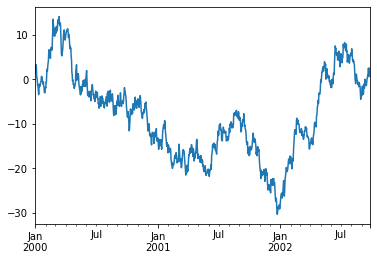

In [609]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

If running under Jupyter Notebook, the plot will appear on plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

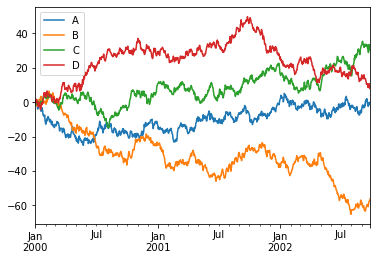

In [614]:
df = pd.DataFrame(

    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]

)

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

### Getting data in/out
#### CSV
Writing to a csv file:

In [615]:
df.to_csv("foo.csv")

Reading froma a csv file:

In [616]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.013493,0.666734,-0.788401,0.088815
1,2000-01-02,-0.378393,-0.398260,-0.223465,-0.565224
2,2000-01-03,0.114593,-1.331685,0.026511,0.054656
3,2000-01-04,-1.640114,-1.649687,0.748616,1.520467
4,2000-01-05,-1.150679,-1.618291,-0.892495,1.698167
...,...,...,...,...,...
995,2002-09-22,-0.251937,-58.169758,30.412301,10.332033
996,2002-09-23,-0.944143,-57.592716,33.603319,10.822946
997,2002-09-24,-1.339398,-57.364545,32.191887,9.921941
998,2002-09-25,0.025855,-57.557407,32.148368,7.907194
